# V.1 Exploring the green reds

## a) Write a function that will plot a scatterplot matrix of your red wine data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import math
def plot_scatter_matrix(winedata, good_threshold, bad_threshold, save_plot=False):
  c = winedata.columns
  fig, axes = plt.subplots(len(c) - 1, len(c) - 1, figsize=(15,15))
  fig.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, wspace=0, hspace=0)
  for i in range(len(c) - 1):
      for j in range(len(c) - 1):
          ax = axes[i, j]
          p = patches.Rectangle((0, 0), 1, 1, fill=True, transform=ax.transAxes,
              clip_on=False, facecolor='#000000', zorder=0.1, edgecolor='#ffffff')
          ax.add_patch(p)
          if (i != j):
              y1 = winedata[winedata['quality'] < bad_threshold][c[i]]
              x1 = winedata[winedata['quality'] < bad_threshold][c[j]]
              y2 = winedata[winedata['quality'] > good_threshold][c[i]]
              x2 = winedata[winedata['quality'] > good_threshold][c[j]]

              ax.scatter(x1, y1, marker='.', s=20, linewidths=0, c='m', alpha=0.8)
              ax.scatter(x2, y2, marker='.', s=20, linewidths=0, c='c', alpha=0.8)
          else:
              ax.text(0.5, 0.5, c[i].replace(' ', '\n'), horizontalalignment='center', verticalalignment='center',
                  transform=ax.transAxes, fontsize='x-large', color="#ffffff")
          ax.set_axis_off()

  if (save_plot == False):
      plt.show()
  else:
     fig.savefig("./test.png")
  return fig

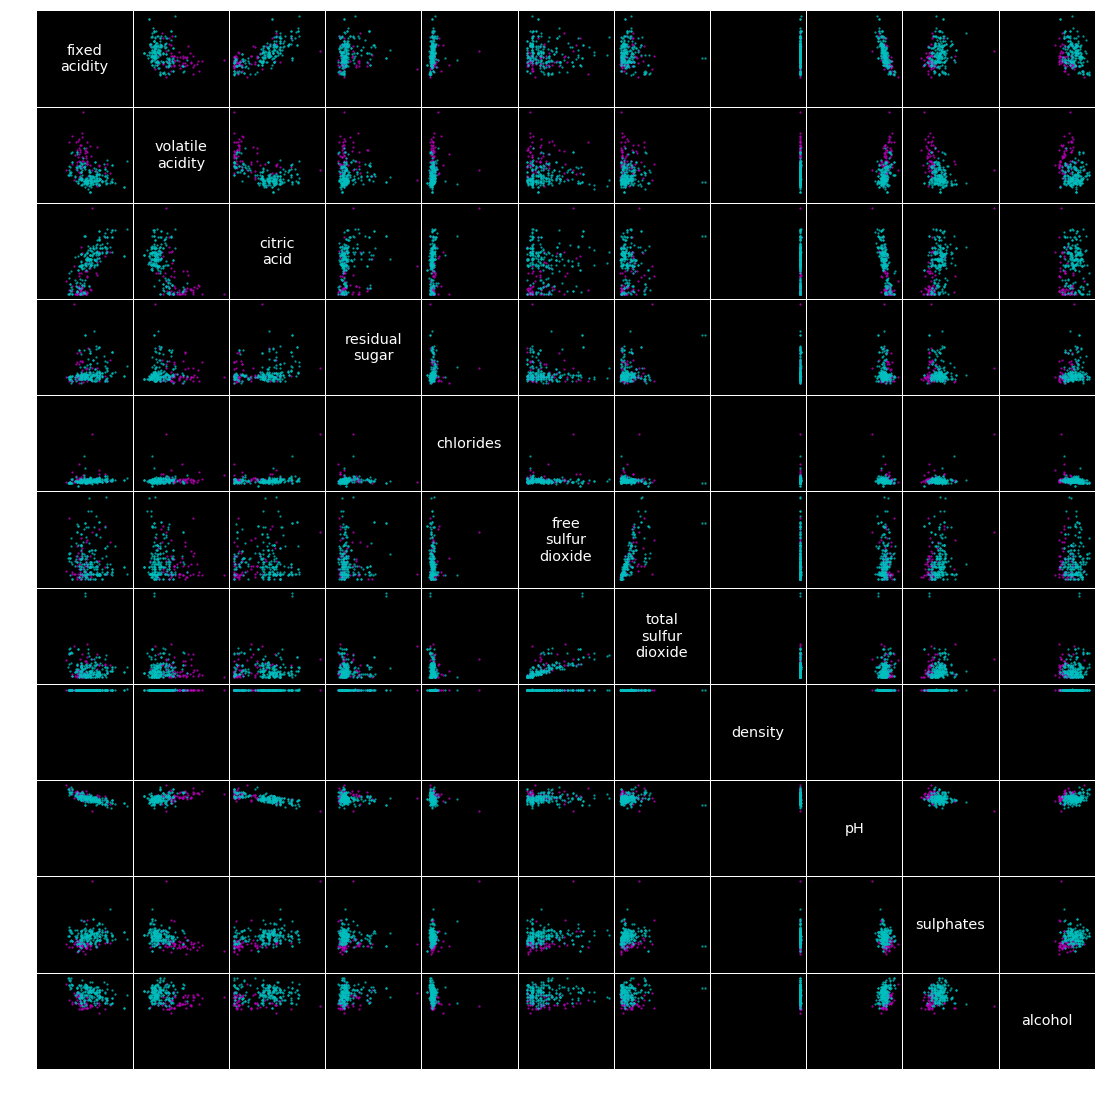

In [21]:
wine_data = pd.read_csv("./winequality-red.csv", sep=';')
fig = plot_scatter_matrix(wine_data, 6, 5, True)
plt.show(fig)

## b) which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

Wine factors such as alcohol and ph will work well at distinguishing wines. Those factors have clear groups that allow perceptrons to easily find classification groups.

# V.2 Learning to perceptron

## a) Implement a perceptron, b) implement a function to train your perceptron.

In [22]:
# Take the wine as good, if it's quality > 5
wine_data = wine_data.assign(goodness=pd.Series(wine_data['quality'] > 5))
# selecting the subset from `wine_data`
# only use wines with a score of 8 or higher and wines with a score of 3 or lower
features = ['pH', 'alcohol', 'quality', 'goodness']
selected_wine_data = wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)][features]
selected_wine_data = selected_wine_data.reset_index(drop=True)

X = selected_wine_data.loc[:, ['pH', 'alcohol']]
Y = selected_wine_data['goodness'].values
print (selected_wine_data)
# print('{} samples selected:\n'.format(selected_wine_data.shape[0]))

      pH  alcohol  quality  goodness
0   3.35    12.80        8      True
1   3.23    12.60        8      True
2   3.56    12.90        8      True
3   2.88     9.80        8      True
4   3.22    13.40        8      True
5   3.25     9.00        3     False
6   3.15    11.70        8      True
7   3.15    11.00        8      True
8   3.15    11.00        8      True
9   3.16     8.40        3     False
10  3.72    14.00        8      True
11  3.63    10.70        3     False
12  3.46    12.70        8      True
13  3.38     9.90        3     False
14  3.48    11.00        3     False
15  3.21    12.50        8      True
16  2.98    11.80        8      True
17  3.20    13.10        8      True
18  3.35    11.70        8      True
19  3.50    14.00        8      True
20  3.50    10.90        3     False
21  3.32     9.80        3     False
22  3.23    10.00        8      True
23  3.23    11.30        8      True
24  3.31     9.70        3     False
25  3.40    10.20        3     False
2

In [23]:
def ft_dot(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError('arguments have different length')
    result = 0.
    for i in range(len(arr1)):
        result += arr1[i] * arr2[i]
    return result


class Perceptron:
    
    def __init__(self, lr):
        self.W = None
        self.lr = lr
        self.performance = list()
    
    def predict(self, inp):
        summ = ft_dot(inp, self.W[1:]) + self.W[0]
        if summ > 0.0:
            return 1
        else:
            return 0
    def train(self, x, y,verbose, epochs):
        epoch = 0
        if self.W is None:
            self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        while epoch <= epochs or epochs == 0:
            epoch_errors = 0
            for xi, yi in zip(x, y):
                pred = self.lr * (yi - self.predict(xi))
                self.W[1:] += pred * xi
                self.W[0] += pred
                epoch_errors += int(pred != 0.0)
            self.performance.append((epoch, epoch_errors, self.W[1:], self.W[0]))
            if verbose and epoch % 10 == 0:
                print('Epoch {}: {} errors'.format(epoch, epoch_errors))
            epoch += 1
            if epoch_errors == 0 and epochs == 0:
                break
        
        return self.performance

In [24]:
perceptron = Perceptron(lr=0.005)
stats = perceptron.train(X.values, Y,verbose=True, epochs=0)
import pprint
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(stats)

Epoch 0: 13 errors
Epoch 10: 2 errors
Epoch 20: 2 errors
Epoch 30: 4 errors
Epoch 40: 8 errors
Epoch 50: 6 errors
Epoch 60: 6 errors
Epoch 70: 4 errors
Epoch 80: 2 errors
Epoch 90: 2 errors
Epoch 100: 8 errors
Epoch 110: 4 errors
Epoch 120: 2 errors
Epoch 130: 8 errors
Epoch 140: 4 errors
Epoch 150: 2 errors
Epoch 160: 6 errors
Epoch 170: 2 errors
Epoch 180: 6 errors
Epoch 190: 3 errors
Epoch 200: 6 errors
Epoch 210: 6 errors
Epoch 220: 6 errors
Epoch 230: 6 errors
Epoch 240: 5 errors
Epoch 250: 3 errors
Epoch 260: 4 errors
Epoch 270: 4 errors
Epoch 280: 4 errors
Epoch 290: 4 errors
Epoch 300: 4 errors
Epoch 310: 4 errors
Epoch 320: 4 errors
Epoch 330: 4 errors
Epoch 340: 4 errors
Epoch 350: 4 errors
Epoch 360: 4 errors
Epoch 370: 4 errors
Epoch 380: 4 errors
Epoch 390: 4 errors
Epoch 400: 4 errors
Epoch 410: 4 errors
Epoch 420: 4 errors
Epoch 430: 4 errors
Epoch 440: 4 errors
Epoch 450: 4 errors
Epoch 460: 4 errors
Epoch 470: 4 errors
Epoch 480: 4 errors
Epoch 490: 4 errors
Epoch 500:

Epoch 4130: 2 errors
Epoch 4140: 2 errors
Epoch 4150: 2 errors
Epoch 4160: 2 errors
Epoch 4170: 1 errors
Epoch 4180: 2 errors
Epoch 4190: 2 errors
Epoch 4200: 2 errors
Epoch 4210: 2 errors
Epoch 4220: 2 errors
Epoch 4230: 2 errors
Epoch 4240: 2 errors
Epoch 4250: 2 errors
Epoch 4260: 2 errors
Epoch 4270: 2 errors
Epoch 4280: 2 errors
Epoch 4290: 2 errors
Epoch 4300: 2 errors
Epoch 4310: 2 errors
Epoch 4320: 2 errors
Epoch 4330: 2 errors
Epoch 4340: 2 errors
Epoch 4350: 2 errors
Epoch 4360: 2 errors
Epoch 4370: 2 errors
Epoch 4380: 2 errors
Epoch 4390: 2 errors
Epoch 4400: 2 errors
Epoch 4410: 2 errors
Epoch 4420: 2 errors
Epoch 4430: 2 errors
Epoch 4440: 2 errors
Epoch 4450: 2 errors
Epoch 4460: 2 errors
Epoch 4470: 2 errors
Epoch 4480: 2 errors
Epoch 4490: 2 errors
Epoch 4500: 2 errors
Epoch 4510: 2 errors
Epoch 4520: 2 errors
Epoch 4530: 2 errors
Epoch 4540: 2 errors
Epoch 4550: 2 errors
Epoch 4560: 2 errors
Epoch 4570: 2 errors
Epoch 4580: 2 errors
Epoch 4590: 2 errors
Epoch 4600: 2

Epoch 8150: 1 errors
Epoch 8160: 2 errors
Epoch 8170: 2 errors
Epoch 8180: 2 errors
Epoch 8190: 2 errors
Epoch 8200: 2 errors
Epoch 8210: 2 errors
Epoch 8220: 2 errors
Epoch 8230: 2 errors
Epoch 8240: 2 errors
Epoch 8250: 2 errors
Epoch 8260: 2 errors
Epoch 8270: 2 errors
Epoch 8280: 2 errors
Epoch 8290: 2 errors
Epoch 8300: 1 errors
Epoch 8310: 2 errors
Epoch 8320: 2 errors
Epoch 8330: 2 errors
Epoch 8340: 2 errors
Epoch 8350: 2 errors
Epoch 8360: 2 errors
Epoch 8370: 2 errors
Epoch 8380: 2 errors
Epoch 8390: 2 errors
Epoch 8400: 2 errors
Epoch 8410: 2 errors
Epoch 8420: 2 errors
Epoch 8430: 2 errors
Epoch 8440: 2 errors
Epoch 8450: 1 errors
Epoch 8460: 2 errors
Epoch 8470: 2 errors
Epoch 8480: 2 errors
Epoch 8490: 2 errors
Epoch 8500: 2 errors
Epoch 8510: 2 errors
Epoch 8520: 2 errors
Epoch 8530: 2 errors
Epoch 8540: 2 errors
Epoch 8550: 2 errors
Epoch 8560: 2 errors
Epoch 8570: 2 errors
Epoch 8580: 2 errors
Epoch 8590: 2 errors
Epoch 8600: 1 errors
Epoch 8610: 2 errors
Epoch 8620: 2

Epoch 11970: 2 errors
Epoch 11980: 2 errors
Epoch 11990: 2 errors
Epoch 12000: 2 errors
Epoch 12010: 2 errors
Epoch 12020: 2 errors
Epoch 12030: 2 errors
Epoch 12040: 2 errors
Epoch 12050: 2 errors
Epoch 12060: 2 errors
Epoch 12070: 2 errors
Epoch 12080: 2 errors
Epoch 12090: 2 errors
Epoch 12100: 2 errors
Epoch 12110: 2 errors
Epoch 12120: 2 errors
Epoch 12130: 2 errors
Epoch 12140: 2 errors
Epoch 12150: 2 errors
Epoch 12160: 2 errors
Epoch 12170: 2 errors
Epoch 12180: 2 errors
Epoch 12190: 2 errors
Epoch 12200: 2 errors
Epoch 12210: 2 errors
Epoch 12220: 2 errors
Epoch 12230: 2 errors
Epoch 12240: 2 errors
Epoch 12250: 2 errors
Epoch 12260: 2 errors
Epoch 12270: 2 errors
Epoch 12280: 1 errors
Epoch 12290: 2 errors
Epoch 12300: 2 errors
Epoch 12310: 2 errors
Epoch 12320: 2 errors
Epoch 12330: 2 errors
Epoch 12340: 2 errors
Epoch 12350: 2 errors
Epoch 12360: 2 errors
Epoch 12370: 2 errors
Epoch 12380: 2 errors
Epoch 12390: 2 errors
Epoch 12400: 2 errors
Epoch 12410: 2 errors
Epoch 1242

    (2116, 2, [-2.2689494970303934, 0.6890415102341351], 0.13002847048799127),
    (2117, 2, [-2.269799497030393, 0.6880415102341351], 0.13002847048799127),
    (2118, 2, [-2.270649497030393, 0.6870415102341351], 0.13002847048799127),
    (2119, 1, [-2.254499497030393, 0.7370415102341351], 0.13502847048799127),
    (2120, 2, [-2.2557494970303926, 0.7320415102341351], 0.13502847048799127),
    (2121, 2, [-2.2569994970303924, 0.7270415102341351], 0.13502847048799127),
    (2122, 2, [-2.258249497030392, 0.7220415102341351], 0.13502847048799127),
    (2123, 2, [-2.259499497030392, 0.7170415102341351], 0.13502847048799127),
    (2124, 2, [-2.2607494970303916, 0.7120415102341351], 0.13502847048799127),
    (2125, 2, [-2.2619994970303914, 0.7070415102341351], 0.13502847048799127),
    (2126, 2, [-2.263249497030391, 0.7020415102341351], 0.13502847048799127),
    (2127, 2, [-2.264099497030391, 0.7010415102341351], 0.13502847048799127),
    (2128, 2, [-2.2649494970303907, 0.7000415102341351], 0.

    (3736, 2, [-2.537949497030044, 0.7400415102341353], 0.5250284704879916),
    (3737, 2, [-2.538799497030044, 0.7390415102341353], 0.5250284704879916),
    (3738, 2, [-2.5396494970300436, 0.7380415102341353], 0.5250284704879916),
    (3739, 1, [-2.5234994970300435, 0.7880415102341354], 0.5300284704879916),
    (3740, 2, [-2.5247494970300433, 0.7830415102341354], 0.5300284704879916),
    (3741, 2, [-2.525999497030043, 0.7780415102341354], 0.5300284704879916),
    (3742, 2, [-2.5272494970300428, 0.7730415102341354], 0.5300284704879916),
    (3743, 2, [-2.5284994970300425, 0.7680415102341354], 0.5300284704879916),
    (3744, 2, [-2.5297494970300423, 0.7630415102341354], 0.5300284704879916),
    (3745, 2, [-2.530999497030042, 0.7580415102341354], 0.5300284704879916),
    (3746, 2, [-2.5322494970300418, 0.7530415102341353], 0.5300284704879916),
    (3747, 2, [-2.5334994970300415, 0.7480415102341353], 0.5300284704879916),
    (3748, 2, [-2.5343494970300413, 0.7470415102341353], 0.530028470

    (5649, 2, [-2.7563994970296264, 0.7650415102341354], 1.0350284704879913),
    (5650, 2, [-2.757249497029626, 0.7640415102341354], 1.0350284704879913),
    (5651, 2, [-2.758099497029626, 0.7630415102341354], 1.0350284704879913),
    (5652, 2, [-2.7589494970296258, 0.7620415102341354], 1.0350284704879913),
    (5653, 1, [-2.7427994970296257, 0.8120415102341354], 1.0400284704879912),
    (5654, 2, [-2.7440494970296254, 0.8070415102341354], 1.0400284704879912),
    (5655, 2, [-2.745299497029625, 0.8020415102341354], 1.0400284704879912),
    (5656, 2, [-2.746549497029625, 0.7970415102341354], 1.0400284704879912),
    (5657, 2, [-2.7477994970296247, 0.7920415102341354], 1.0400284704879912),
    (5658, 2, [-2.7490494970296244, 0.7870415102341354], 1.0400284704879912),
    (5659, 2, [-2.750299497029624, 0.7820415102341354], 1.0400284704879912),
    (5660, 2, [-2.751549497029624, 0.7770415102341354], 1.0400284704879912),
    (5661, 2, [-2.7527994970296237, 0.7720415102341354], 1.04002847048

    (7278, 2, [-2.9404494970292707, 0.7890415102341354], 1.470028470487982),
    (7279, 2, [-2.9412994970292705, 0.7880415102341354], 1.470028470487982),
    (7280, 2, [-2.9421494970292703, 0.7870415102341354], 1.470028470487982),
    (7281, 2, [-2.94299949702927, 0.7860415102341354], 1.470028470487982),
    (7282, 2, [-2.94384949702927, 0.7850415102341354], 1.470028470487982),
    (7283, 2, [-2.9446994970292697, 0.7840415102341354], 1.470028470487982),
    (7284, 2, [-2.9455494970292695, 0.7830415102341354], 1.470028470487982),
    (7285, 2, [-2.9463994970292693, 0.7820415102341354], 1.470028470487982),
    (7286, 1, [-2.930249497029269, 0.8320415102341354], 1.475028470487982),
    (7287, 2, [-2.931499497029269, 0.8270415102341354], 1.475028470487982),
    (7288, 2, [-2.9327494970292687, 0.8220415102341354], 1.475028470487982),
    (7289, 2, [-2.9339994970292684, 0.8170415102341354], 1.475028470487982),
    (7290, 2, [-2.935249497029268, 0.8120415102341354], 1.475028470487982),
    (7

    (9648, 2, [-3.2161494970287534, 0.8130415102341354], 2.1000284704879686),
    (9649, 2, [-3.216999497028753, 0.8120415102341354], 2.1000284704879686),
    (9650, 2, [-3.217849497028753, 0.8110415102341354], 2.1000284704879686),
    (9651, 2, [-3.218699497028753, 0.8100415102341354], 2.1000284704879686),
    (9652, 1, [-3.2025494970287527, 0.8600415102341354], 2.1050284704879685),
    (9653, 2, [-3.2037994970287524, 0.8550415102341354], 2.1050284704879685),
    (9654, 2, [-3.205049497028752, 0.8500415102341354], 2.1050284704879685),
    (9655, 2, [-3.206299497028752, 0.8450415102341354], 2.1050284704879685),
    (9656, 2, [-3.2075494970287517, 0.8400415102341354], 2.1050284704879685),
    (9657, 2, [-3.2087994970287514, 0.8350415102341354], 2.1050284704879685),
    (9658, 2, [-3.210049497028751, 0.8300415102341354], 2.1050284704879685),
    (9659, 2, [-3.211299497028751, 0.8250415102341354], 2.1050284704879685),
    (9660, 2, [-3.2125494970287507, 0.8200415102341354], 2.105028470487

    (12147, 2, [-3.504899497028208, 0.8410415102341354], 2.7650284704879544),
    (12148, 1, [-3.488749497028208, 0.8910415102341355], 2.7700284704879543),
    (12149, 2, [-3.4899994970282076, 0.8860415102341355], 2.7700284704879543),
    (12150, 2, [-3.4912494970282073, 0.8810415102341355], 2.7700284704879543),
    (12151, 2, [-3.492499497028207, 0.8760415102341355], 2.7700284704879543),
    (12152, 2, [-3.493749497028207, 0.8710415102341355], 2.7700284704879543),
    (12153, 2, [-3.4949994970282066, 0.8660415102341354], 2.7700284704879543),
    (12154, 2, [-3.4962494970282063, 0.8610415102341354], 2.7700284704879543),
    (12155, 2, [-3.497499497028206, 0.8560415102341354], 2.7700284704879543),
    (12156, 2, [-3.498749497028206, 0.8510415102341354], 2.7700284704879543),
    (12157, 2, [-3.4995994970282056, 0.8500415102341354], 2.7700284704879543),
    (12158, 2, [-3.5004494970282054, 0.8490415102341354], 2.7700284704879543),
    (12159, 2, [-3.501299497028205, 0.8480415102341354], 2

## c)function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure:

In [25]:
def plot_performance(stats, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    fig, axe = plt.subplots(2, 1, figsize=(10,10))
#     fig.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, wspace=0, hspace=0)
    plt.figure(1)
    y2 = wine_data[(wine_data['quality'] >= good_thresh )]['pH']
    x2 = wine_data[(wine_data['quality']>= good_thresh)]['alcohol']
    y1 = wine_data[(wine_data['quality'] <= bad_thresh)]['pH']
    x1 = wine_data[(wine_data['quality'] <= bad_thresh)]['alcohol']
    # print(x1.values)
    res = stats[epoch]
    # for 
    # y = (-(b / w2) / (b / w1))x + (-b / w2)
    # y = (-(res[3] / res[2][1]) / (res[3] / res[2][0])) * x + (-res[3] / res[2][1])
    plt.subplot(211)
    plt.scatter(x1.values, y1.values, marker='o', s=20, linewidths=0, c='r', alpha=0.8)
    plt.scatter(x2.values, y2.values, marker='o', s=20, linewidths=0, c='g', alpha=0.8)
    w2, w1 = res[2]
    b = res[3]
    # for i in range()):
    #     x.append(i)
    #     y.append((-(res[3] / res[2][1]) / (res[3] / res[2][0])) * i + (-res[3] / res[2][1]))
    #     print("w1 = {}, w2 = {}, b = {}, x = {}, y = {}".format(, , , i, y[-1]))
    x = range(int(min(wine_data['alcohol'].values)), int(max(wine_data['alcohol'].values)))
    y = (w1 * x  + b) / -w2
    plt.plot(x,  y)

    x = []
    y = []
    for col in stats[:epoch]:
        x.append(col[0])
        y.append(col[1])
    plt.subplot(212)
    plt.plot(x, y)
    if (save_plot==False):   
        plt.show()
    else:
        fig.savefig("./err_boundary.png")
    return fig



## d) Use the function you just created in part c) to plot and verify that your perceptron is learning more efficiently!

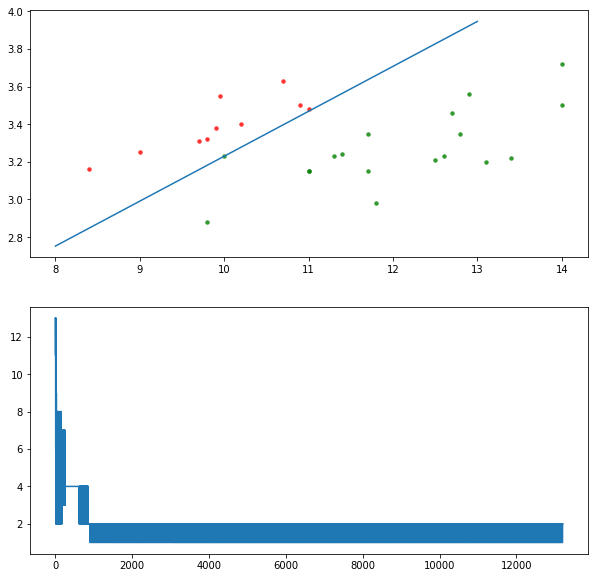

In [26]:
plt.show(plot_performance(stats, selected_wine_data, 8, 3))

# V.3 My fair ADALINE

## Implement an ADALINE

In [52]:
def ft_dot(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError('arguments have different length')
    result = 0.0
    for a, b in zip(arr1, arr2):
        result += a * b
    return result


class Adaline:
    def __init__(self):
        self.W = None
        self.performance = list()
    
    def Transpose(self, m):
        res = list(map(list, zip(*m)))
        return (res)
    
    def _net_input_(self, xi):
        return ft_dot(self.W[1:], xi) + self.W[0]

    
    def activation(self, x):
        return 1 / (1 + math.exp(-self._net_input_(x)))
    
    def predict(self, X, Y):
        num_missclass = 0
        for xi, yi in zip(X, Y):
            prediction = 1 if self.activation(xi) > 0.5 else 0
            num_missclass += int(prediction != int(yi))
        return (num_missclass)

    def train(self, X, Y, epochs, lr, verbose=False, mode="batch"):
        cur_epoch = 0
        flag = 1 if mode == "batch" else 0
        if self.W == None:
            self.W = [random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        while cur_epoch < epochs or epochs == 0:
            errors = []
            for xi, yi in zip (X, Y):
                err = yi - self.activation(xi)
                errors.append(err)
                if not flag:
                    self.W[0] += lr * err
                    self.W[1:] += lr * err * xi
            if flag:
                self.W[0] += lr * sum(errors)
                self.W[1:] += lr * ft_dot(X, errors)
            pred = self.predict(X, Y)
            self.performance.append([cur_epoch, pred, self.W[1:], self.W[0]])
            if verbose and cur_epoch % 10 == 0:
                print('Epoch {}: {} errors'.format(cur_epoch, pred))
            if epochs == 0 and errors == 0:
                break;
            cur_epoch +=1
        return self.performance

In [28]:
ada = Adaline()
performance = ada.train(X.values, Y, 6000, 0.005, verbose=True, mode="online")


Epoch 0: 10 errors
Epoch 10: 10 errors
Epoch 20: 5 errors
Epoch 30: 2 errors
Epoch 40: 3 errors
Epoch 50: 2 errors
Epoch 60: 2 errors
Epoch 70: 2 errors
Epoch 80: 2 errors
Epoch 90: 1 errors
Epoch 100: 1 errors
Epoch 110: 1 errors
Epoch 120: 1 errors
Epoch 130: 1 errors
Epoch 140: 1 errors
Epoch 150: 1 errors
Epoch 160: 1 errors
Epoch 170: 1 errors
Epoch 180: 1 errors
Epoch 190: 1 errors
Epoch 200: 1 errors
Epoch 210: 1 errors
Epoch 220: 1 errors
Epoch 230: 1 errors
Epoch 240: 1 errors
Epoch 250: 1 errors
Epoch 260: 1 errors
Epoch 270: 1 errors
Epoch 280: 1 errors
Epoch 290: 1 errors
Epoch 300: 1 errors
Epoch 310: 1 errors
Epoch 320: 1 errors
Epoch 330: 1 errors
Epoch 340: 1 errors
Epoch 350: 1 errors
Epoch 360: 1 errors
Epoch 370: 1 errors
Epoch 380: 1 errors
Epoch 390: 1 errors
Epoch 400: 1 errors
Epoch 410: 1 errors
Epoch 420: 1 errors
Epoch 430: 1 errors
Epoch 440: 1 errors
Epoch 450: 1 errors
Epoch 460: 1 errors
Epoch 470: 1 errors
Epoch 480: 1 errors
Epoch 490: 1 errors
Epoch 500

Epoch 4260: 1 errors
Epoch 4270: 1 errors
Epoch 4280: 1 errors
Epoch 4290: 1 errors
Epoch 4300: 1 errors
Epoch 4310: 1 errors
Epoch 4320: 1 errors
Epoch 4330: 1 errors
Epoch 4340: 1 errors
Epoch 4350: 1 errors
Epoch 4360: 1 errors
Epoch 4370: 1 errors
Epoch 4380: 1 errors
Epoch 4390: 1 errors
Epoch 4400: 1 errors
Epoch 4410: 1 errors
Epoch 4420: 1 errors
Epoch 4430: 1 errors
Epoch 4440: 1 errors
Epoch 4450: 1 errors
Epoch 4460: 1 errors
Epoch 4470: 1 errors
Epoch 4480: 1 errors
Epoch 4490: 1 errors
Epoch 4500: 1 errors
Epoch 4510: 1 errors
Epoch 4520: 1 errors
Epoch 4530: 1 errors
Epoch 4540: 1 errors
Epoch 4550: 1 errors
Epoch 4560: 1 errors
Epoch 4570: 1 errors
Epoch 4580: 1 errors
Epoch 4590: 1 errors
Epoch 4600: 1 errors
Epoch 4610: 1 errors
Epoch 4620: 1 errors
Epoch 4630: 1 errors
Epoch 4640: 1 errors
Epoch 4650: 1 errors
Epoch 4660: 1 errors
Epoch 4670: 1 errors
Epoch 4680: 1 errors
Epoch 4690: 1 errors
Epoch 4700: 1 errors
Epoch 4710: 1 errors
Epoch 4720: 1 errors
Epoch 4730: 1

In [29]:
print (performance)

[[0, 10, [0.07304309272510501, 0.01372476414405335], -0.05064264103624422], [1, 10, [0.046490834153385105, 0.004987849383015677], -0.057295462046980106], [2, 10, [0.024396562136732074, 0.011985211487943844], -0.06259880344745485], [3, 10, [0.0024647459696317993, 0.019131424815322626], -0.06785591639727304], [4, 10, [-0.01935500921792361, 0.02624507921341543], -0.07308207413297771], [5, 10, [-0.04106368099262678, 0.033324231096505716], -0.07827755665544443], [6, 10, [-0.06266170388583436, 0.04036894040121575], -0.08344247913028006], [7, 10, [-0.08414951392475933, 0.04737929326099813], -0.0885769571115155], [8, 10, [-0.10552755446973393, 0.054355379863442466], -0.09368110832203928], [9, 10, [-0.12679627604432325, 0.06129729410414353], -0.09875505261106372], [10, 10, [-0.14795613609937347, 0.0682051334839636], -0.1037989118912293], [11, 9, [-0.1690075987774879, 0.07507899900920134], -0.1088128100755265], [12, 9, [-0.18995113467882205, 0.08191899509206599], -0.11379687301430762], [13, 8, [

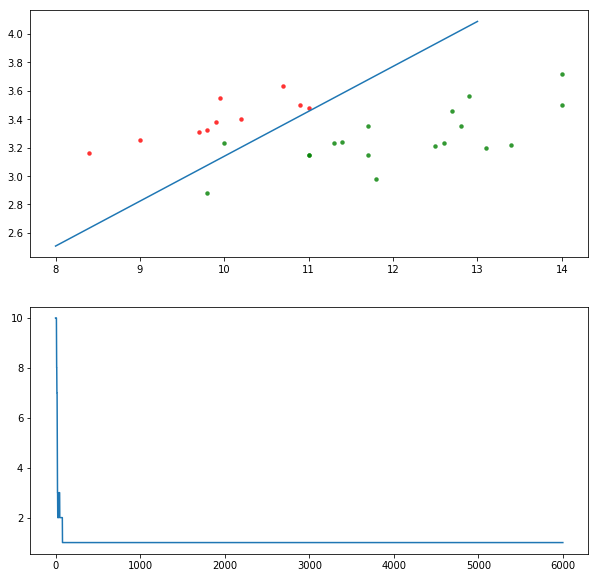

In [30]:
plt.show(plot_performance(performance, selected_wine_data, 7, 4,save_plot = True))

In [31]:
print (wine_data.sample(frac=0.7))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
972            10.1             0.380         0.50             2.4      0.104   
442            15.6             0.685         0.76             3.7      0.100   
675             9.3             0.410         0.39             2.2      0.064   
582            11.7             0.490         0.49             2.2      0.083   
580            12.3             0.500         0.49             2.2      0.089   
776             6.9             0.765         0.18             2.4      0.243   
1527            7.1             0.530         0.07             1.7      0.071   
1297            7.2             0.530         0.14             2.1      0.064   
1333            9.1             0.775         0.22             2.2      0.079   
575            12.3             0.270         0.49             3.1      0.079   
3              11.2             0.280         0.56             1.9      0.075   
1261            6.3         

# V.4 Advanced wine sampling and resampling

In [32]:
def holdout_partition(data, part = 0.7):
    training = data.sample(frac=part)
    validation = data.query('index not in @training.index')
    return (training, validation)

In [33]:
train, validation = holdout_partition(selected_wine_data)
print (train)
print (validation)

      pH  alcohol  quality  goodness
14  3.48    11.00        3     False
4   3.22    13.40        8      True
7   3.15    11.00        8      True
18  3.35    11.70        8      True
12  3.46    12.70        8      True
16  2.98    11.80        8      True
17  3.20    13.10        8      True
22  3.23    10.00        8      True
10  3.72    14.00        8      True
21  3.32     9.80        3     False
27  3.24    11.40        8      True
3   2.88     9.80        8      True
25  3.40    10.20        3     False
23  3.23    11.30        8      True
9   3.16     8.40        3     False
5   3.25     9.00        3     False
20  3.50    10.90        3     False
6   3.15    11.70        8      True
11  3.63    10.70        3     False
26  3.55     9.95        3     False
      pH  alcohol  quality  goodness
0   3.35     12.8        8      True
1   3.23     12.6        8      True
2   3.56     12.9        8      True
8   3.15     11.0        8      True
13  3.38      9.9        3     False
1

In [34]:
def k_fold_split(data, k, shuffle=True):
    folds = []
    
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    start = 0
    end = 0
    fold_size = 0
    for i in range(k):
        start += fold_size
        fold_size = data.shape[0] // k + 1 if i < data.shape[0] % k else data.shape[0] // k
        end = start + fold_size
        test_data = data.iloc[start: end, :]
        train_data = data.query('index not in @test_data.index')
        folds.append([train_data, test_data])
    
    return pd.DataFrame(folds, columns=["trainData", "testData"])

In [35]:
folds = k_fold_split(selected_wine_data, 5)
print (folds["testData"][3])

      pH  alcohol  quality  goodness
18  3.38      9.9        3     False
19  3.56     12.9        8      True
20  3.48     11.0        3     False
21  3.32      9.8        3     False
22  3.35     12.8        8      True


In [73]:
def k_fold_train(data, lr, epochs, features):
    folds = k_fold_split(data, 5)
#     X = data[0].loc[:, features].values
#     Y = data[0].loc['goodness'].values
    ada = Adaline()
    i = 0
    errors = 0
    for fold in folds.values:
        ada.train(fold[0].loc[:, features].values, fold[0]['goodness'].values, epochs, lr, verbose=False, mode="batch")
        errors += ada.predict(fold[1].loc[:,features].values, fold[1]['goodness'].values)
        i+=1
    print ("lr = {}, errors={}, epochs per fold = {}, features= {}".format(lr, errors, epochs, features) )

In [66]:
lr_array = [0.0005, 0.005, 0.05, 0.0035, 0.009, 0.0032, 0.00053, 0.0001, 0.01]

In [44]:
for rate in lr_array:
    for i in range(1, 5) :
        print ("Run No:{}, epochs={}, lr ={}".format(i, i * 1000, rate))
        k_fold_train(selected_wine_data, rate, i * 1000, ['pH', 'alcohol'])

Run No:1, epochs=1000, lr =0.0005
fold 0: lr = 0.0005, errors=2, epochs per fold = 1000
fold 1: lr = 0.0005, errors=0, epochs per fold = 1000
fold 2: lr = 0.0005, errors=0, epochs per fold = 1000
fold 3: lr = 0.0005, errors=0, epochs per fold = 1000
fold 4: lr = 0.0005, errors=1, epochs per fold = 1000
Run No:2, epochs=2000, lr =0.0005
fold 0: lr = 0.0005, errors=1, epochs per fold = 2000
fold 1: lr = 0.0005, errors=0, epochs per fold = 2000
fold 2: lr = 0.0005, errors=0, epochs per fold = 2000
fold 3: lr = 0.0005, errors=0, epochs per fold = 2000
fold 4: lr = 0.0005, errors=1, epochs per fold = 2000
Run No:3, epochs=3000, lr =0.0005
fold 0: lr = 0.0005, errors=0, epochs per fold = 3000
fold 1: lr = 0.0005, errors=0, epochs per fold = 3000
fold 2: lr = 0.0005, errors=1, epochs per fold = 3000
fold 3: lr = 0.0005, errors=1, epochs per fold = 3000
fold 4: lr = 0.0005, errors=0, epochs per fold = 3000
Run No:4, epochs=4000, lr =0.0005
fold 0: lr = 0.0005, errors=0, epochs per fold = 4000


fold 1: lr = 0.00053, errors=1, epochs per fold = 4000
fold 2: lr = 0.00053, errors=0, epochs per fold = 4000
fold 3: lr = 0.00053, errors=0, epochs per fold = 4000
fold 4: lr = 0.00053, errors=0, epochs per fold = 4000
Run No:1, epochs=1000, lr =0.0001
fold 0: lr = 0.0001, errors=2, epochs per fold = 1000
fold 1: lr = 0.0001, errors=4, epochs per fold = 1000
fold 2: lr = 0.0001, errors=3, epochs per fold = 1000
fold 3: lr = 0.0001, errors=1, epochs per fold = 1000
fold 4: lr = 0.0001, errors=0, epochs per fold = 1000
Run No:2, epochs=2000, lr =0.0001
fold 0: lr = 0.0001, errors=3, epochs per fold = 2000
fold 1: lr = 0.0001, errors=1, epochs per fold = 2000
fold 2: lr = 0.0001, errors=0, epochs per fold = 2000
fold 3: lr = 0.0001, errors=1, epochs per fold = 2000
fold 4: lr = 0.0001, errors=0, epochs per fold = 2000
Run No:3, epochs=3000, lr =0.0001
fold 0: lr = 0.0001, errors=3, epochs per fold = 3000
fold 1: lr = 0.0001, errors=1, epochs per fold = 3000
fold 2: lr = 0.0001, errors=1,

In [ ]:
for rate in lr_array:
    for i in range(1, 5):
        print ("Run No:{}, epochs={}, lr ={}".format(i, i * 1000, rate))
        k_fold_train(data, rate, i * 1000, features)

In [74]:

columns = ['pH', 'alcohol', 'volatile acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)

columns = ['pH', 'alcohol', 'sulphates']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)

columns = ['pH', 'alcohol', 'fixed acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)


columns = ['pH', 'alcohol', 'sulphates', 'volatile acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)


columns = ['pH', 'alcohol', 'sulphates', 'fixed acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)


columns = ['pH', 'alcohol', 'volatile acidity', 'fixed acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)


columns = ['pH', 'alcohol', 'sulphates', 'volatile acidity', 'fixed acidity']
k_fold_train(wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)], 0.0035,  2000, columns)

lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'volatile acidity']
lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'sulphates']
lr = 0.0035, errors=1, epochs per fold = 2000, features= ['pH', 'alcohol', 'fixed acidity']
lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'sulphates', 'volatile acidity']
lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'sulphates', 'fixed acidity']
lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'volatile acidity', 'fixed acidity']
lr = 0.0035, errors=0, epochs per fold = 2000, features= ['pH', 'alcohol', 'sulphates', 'volatile acidity', 'fixed acidity']


# V.6 Marvin’s rebuttal

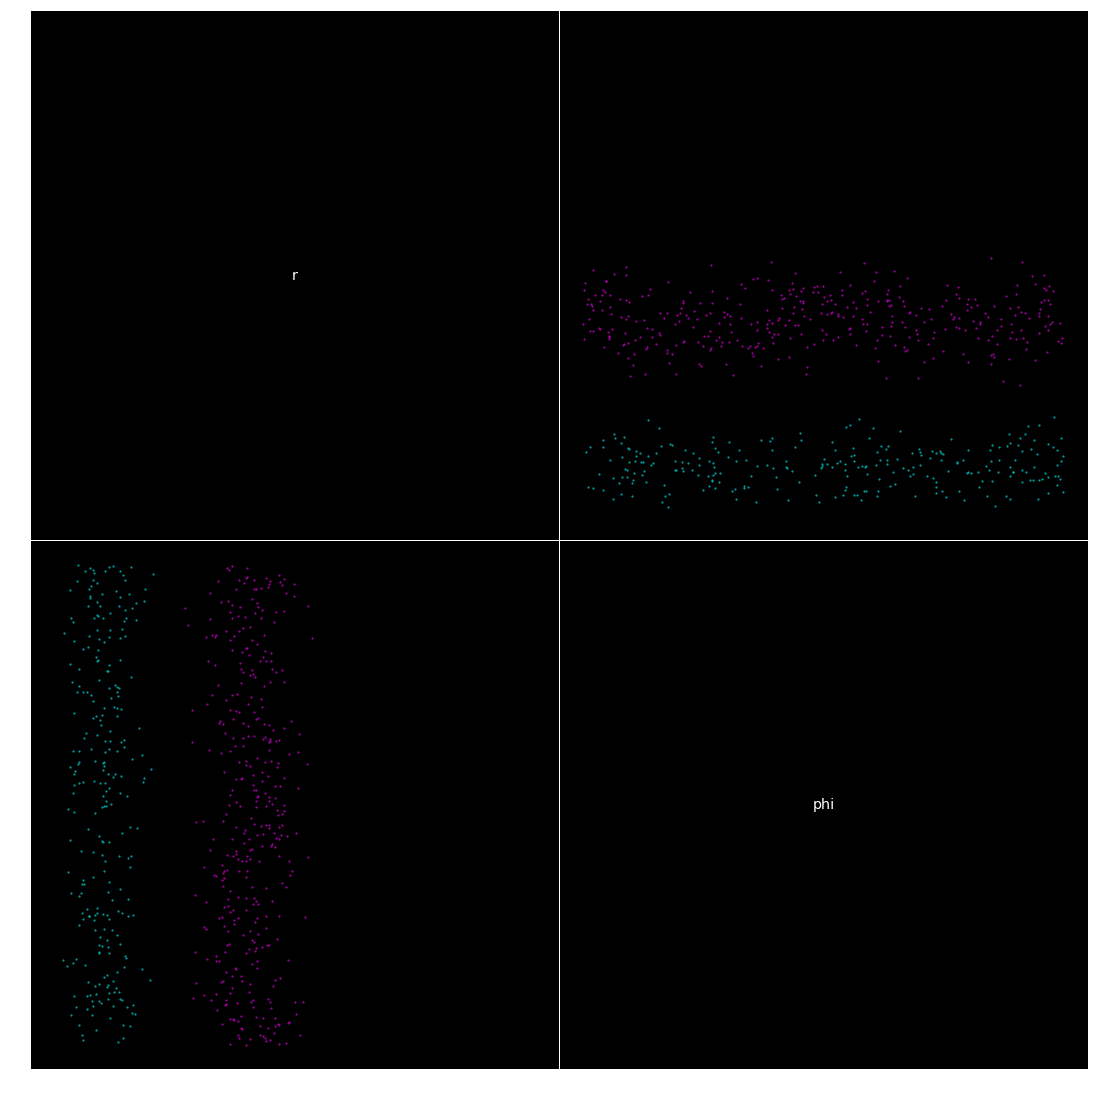

In [95]:

def normalize(data):
    r = data.max() - data.min()
    m = mean(data)
    for i in range(len(data)):
        data.values[i] = (data.values[i] - m) / r
    return data

def mean(data):
    return (sum(data) / len(data))

df = pd.read_csv("./Pan Galactic Gargle Blaster.csv", sep=';')
x1 = normalize(df.loc[:, 'wonderflonium'])
x2 = normalize(df.loc[:, 'fallian marsh gas'])

df = df.assign(r=pd.Series(x1 * x1 + x2 * x2).pow(1./2))
df = df.assign(phi=pd.Series([math.atan2(x, y) for (x, y) in zip(x1, x2)]))
data = df[['r', 'phi', 'quality']]
data = data.assign(goodness=pd.Series(wine_data['quality'] > 5))
# print (data)
matrixplot = plot_scatter_matrix(data[['r', 'phi', 'quality']], 7, 4, True)


In [ ]:
k_fold_train(data[(data['quality'] > 8) | (data['quality'] < 3)], 0.0035,  2000, ['r', 'phi'])